<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Text_classification_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the necessary libraries

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
news=datasets.fetch_20newsgroups()
data = news.target_names
data

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Defining all the categories

In [13]:
classes = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Training the data on these categories

In [14]:
train = fetch_20newsgroups(subset="train", categories=classes)

Testing the data for these categories

In [15]:
test = fetch_20newsgroups(subset="test", categories=classes)

Printing training data

In [16]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

Printing testing data

In [17]:
print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

Length of data

In [18]:
print(len(train.data))

11314


In [19]:
print(len(test.data))

7532


In [27]:
train.target

array([7, 4, 4, ..., 3, 1, 8])

In [28]:
test.target

array([ 7,  5,  0, ...,  9,  6, 15])

Importing necessary packages for model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

Creating a model based on Multinomial Naive Bayes

In [23]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Training the model with the train data

In [24]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

Creating labels for the test data

In [26]:
labels = model.predict(test.data)
labels

array([ 7, 11,  0, ...,  9,  3, 15])

Creating confusion matrix and heatmap

Text(89.17999999999999, 0.5, 'Predicted label')

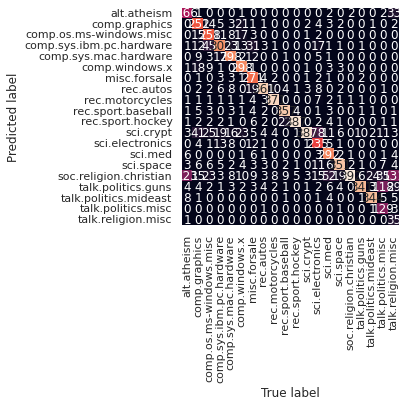

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

Plotting Heatmap of confusion matrix

Text(0, 0.5, 'predicted label')

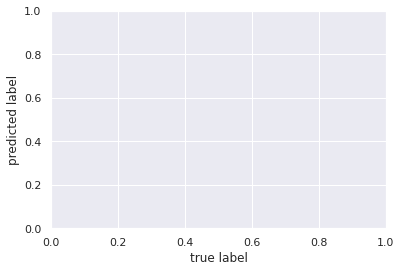

In [32]:
plt.xlabel('true label')
plt.ylabel('predicted label')

Predicting category on new data based on trained model

In [35]:
def predict_category(s, train=train, model=model):
  pred= model.predict([s])
  return train.target_names[pred[0]]

In [36]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [39]:
predict_category('I hate you')

'talk.politics.mideast'

In [40]:
predict_category('Sending load to international space station')

'sci.space'